## Import Package

In [1]:
#!pip install optuna
#!pip install catboost

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import optuna
from sklearn import preprocessing
from sklearn import svm
from sklearn import metrics
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KDTree
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc, roc_curve


# Regression
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgbm
import catboost as cat
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

c:\Users\Chuxu\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\Chuxu\anaconda3\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


## Upload Datasets

In [3]:
data=pd.read_csv(r"C:\Users\Chuxu\ESE527\googleplaystore.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [4]:
data.shape

(10841, 13)

# Descriptive Analysis

## Data Cleaning

In [5]:
data = data.drop(['App','Current Ver','Android Ver'], axis=1)
# data = data.drop(['App','Current Ver','Android Ver'], axis=1)
# # Convert the 'last_updated' column to datetime, specifying the format
# data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y')

# # Reference date (e.g., today's date)
# reference_date = pd.Timestamp.now()

# # Calculate the number of days since the last update
# data['days_since_last_update'] = (reference_date - data['last_updated']).dt.days

# print(data)

In [6]:
data[~data.Reviews.str.isnumeric()]

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19


In [7]:
data=data.drop(data.index[10472])

In [8]:
items_to_remove=['+',',','$'] # Remove special symbols
cols_to_clean=['Installs','Price','Size']
for item in items_to_remove:
    for col in cols_to_clean:
        data[col]=data[col].str.replace(item,'')

In [9]:
data['Installs'] = data['Installs'].astype('int') # Change data type
data['Price'] = data['Price'].astype('float')
data['Reviews'] = data['Reviews'].astype('int')
data['Size'] = data['Size'].str.replace('M','000')
data['Size'] = data['Size'].str.replace('k','')
data['Size'] = data['Size'].replace("Varies with device",np.nan)
data['Size'] = data['Size'].astype('float')
for i in data['Size']:
    if i < 10:
        data['Size'] = data['Size'].replace(i,i*1000)
data['Size'] = data['Size']/1000

In [10]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
                   'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})

In [11]:
data=data.dropna() # Remove all null value

In [12]:
null = pd.DataFrame({'Null Values':data.isna().sum().sort_values(ascending=False),
'Percentage Null Values':(data.isna().sum().sort_values(ascending=False))/(data.shape[0])*(100)})
null
data.shape

(7729, 10)

In [13]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [14]:
duplicate = data.duplicated()
print(duplicate.sum())
data.drop_duplicates(inplace=True)
duplicate = data.duplicated()
print(duplicate.sum())

307
0


In [15]:
# Convert the 'last_updated' column to datetime, specifying the format
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='%B %d, %Y')
# Reference date (e.g., today's date)
reference_date = pd.to_datetime("2018-08-08")
# Calculate the number of days since the last update
data['days_since_last_update'] = (reference_date - data['Last Updated']).dt.days
data = data.drop(['Last Updated'], axis=1)
print(data)
print(data['days_since_last_update'].min())

                  Category  Rating  Reviews    Size  Installs  Type  Price  \
0           ART_AND_DESIGN     4.1      159  19.000     10000  Free    0.0   
1           ART_AND_DESIGN     3.9      967  14.000    500000  Free    0.0   
2           ART_AND_DESIGN     4.7    87510   8.700   5000000  Free    0.0   
3           ART_AND_DESIGN     4.5   215644  25.000  50000000  Free    0.0   
4           ART_AND_DESIGN     4.3      967   2.800    100000  Free    0.0   
...                    ...     ...      ...     ...       ...   ...    ...   
10833  BOOKS_AND_REFERENCE     4.8       44   0.619      1000  Free    0.0   
10834               FAMILY     4.0        7   2.600       500  Free    0.0   
10836               FAMILY     4.5       38  53.000      5000  Free    0.0   
10837               FAMILY     5.0        4   3.600       100  Free    0.0   
10840            LIFESTYLE     4.5   398307  19.000  10000000  Free    0.0   

      Content Rating                     Genres  days_since_las

## Data Visualization

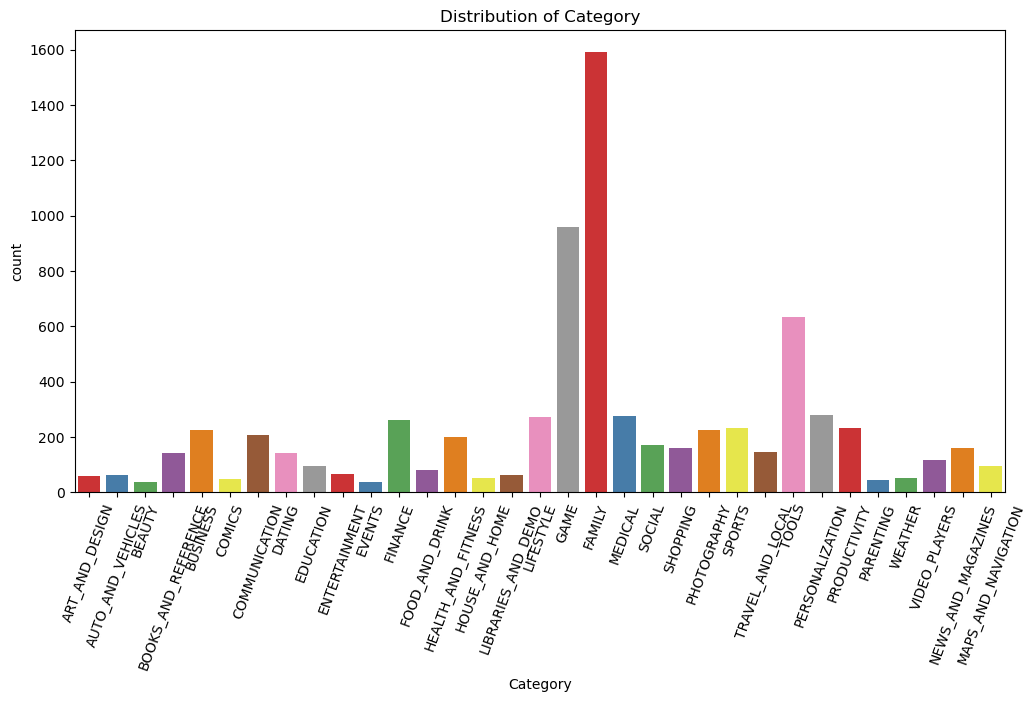

In [16]:
plt.rcParams['figure.figsize']=(12,6)
sns.countplot(x='Category',data=data,palette="Set1")
plt.xticks(rotation=70)
plt.title("Distribution of Category")
plt.show()

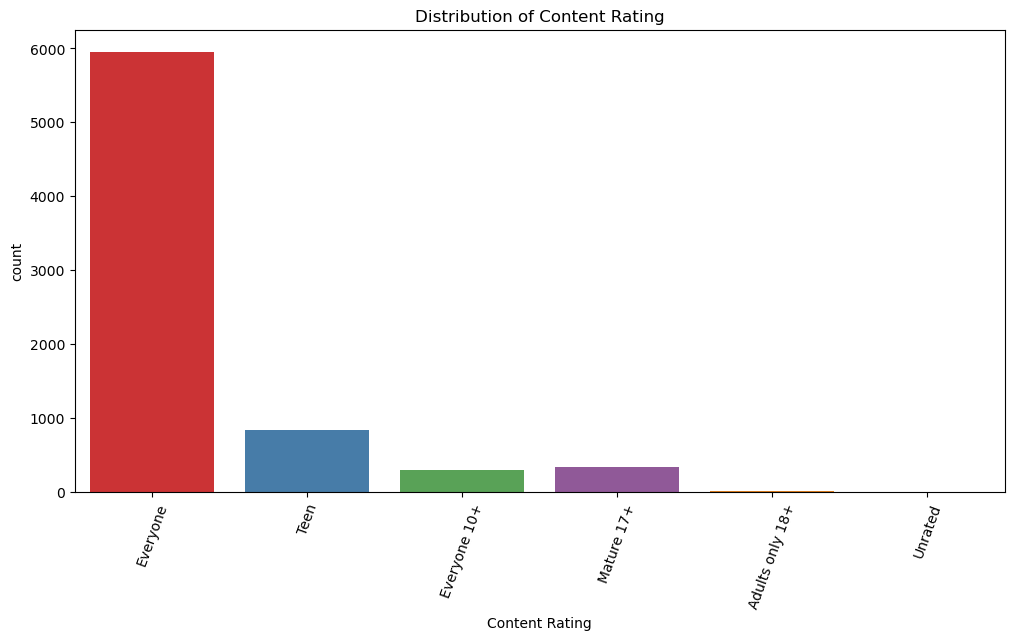

In [17]:
plt.rcParams['figure.figsize']=(12,6)
sns.countplot(x='Content Rating',data=data,palette="Set1")
plt.title("Distribution of Content Rating")
plt.xticks(rotation=70)
plt.show()

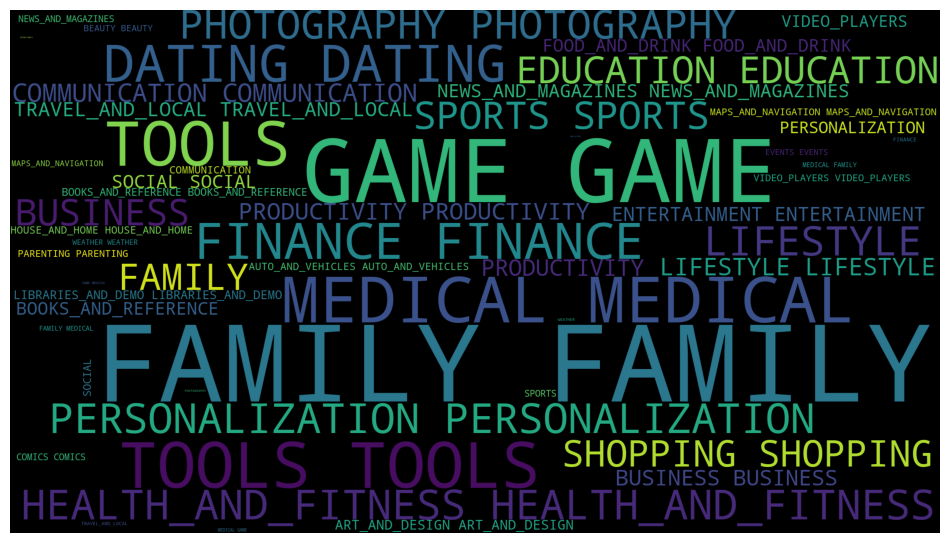

In [18]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(background_color='black',width=1920,height=1080).generate(" ".join(data.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

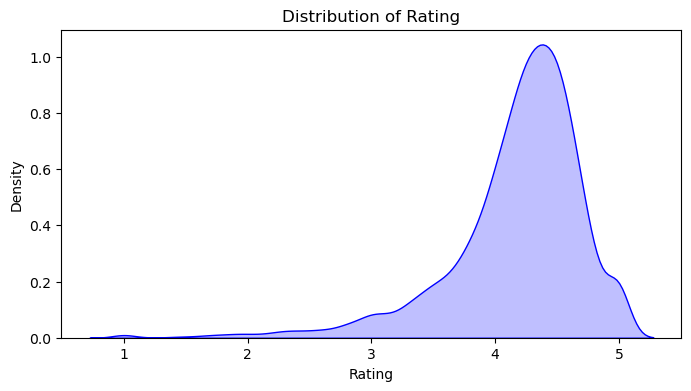

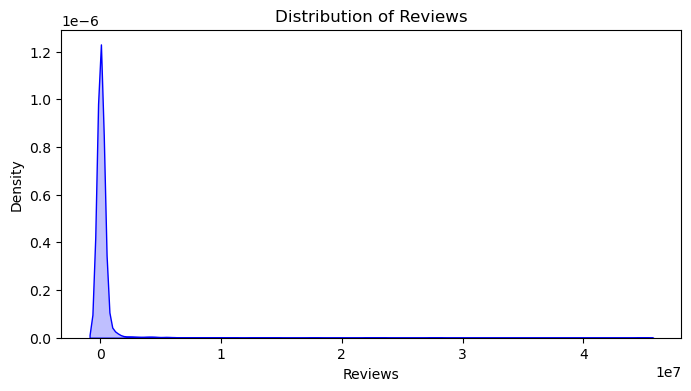

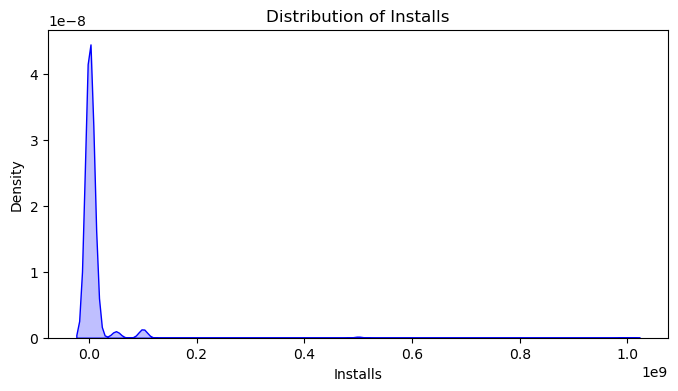

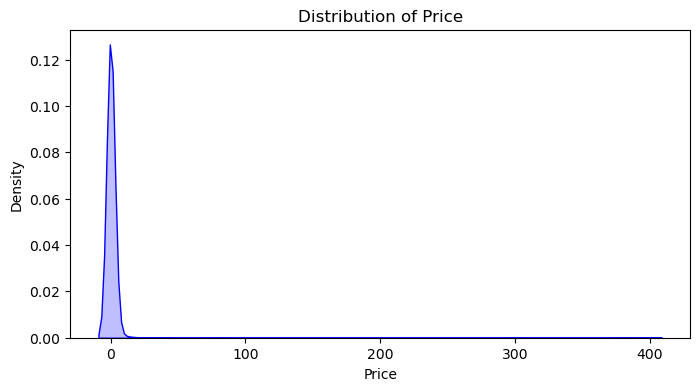

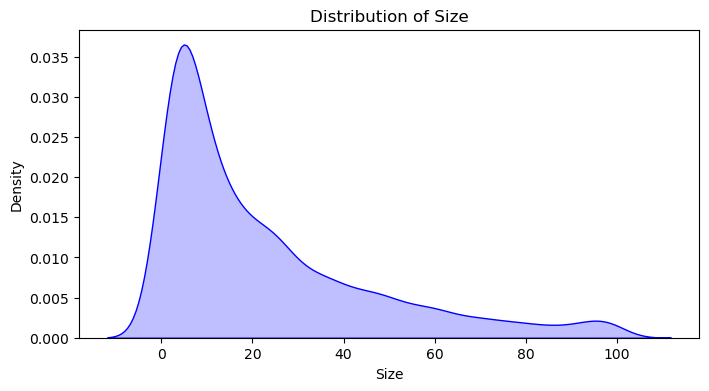

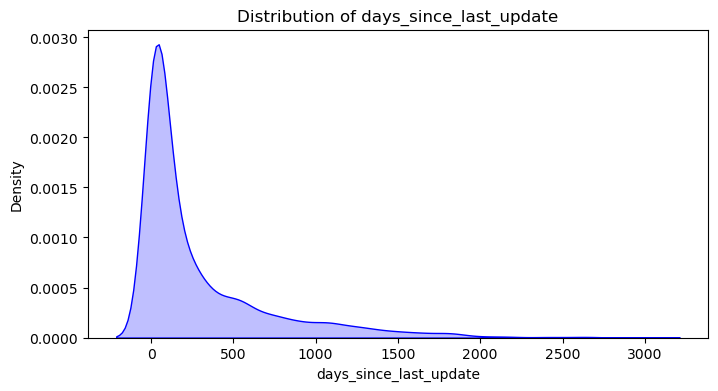

In [19]:
numeric_cols = ['Rating', 'Reviews', 'Installs', 'Price', 'Size', 'days_since_last_update']
for i in range(6):
  plt.figure(figsize=(8,4))
  sns.kdeplot(data[numeric_cols[i]],color='blue',fill=True)
  plt.title("Distribution of "+numeric_cols[i])

<Axes: >

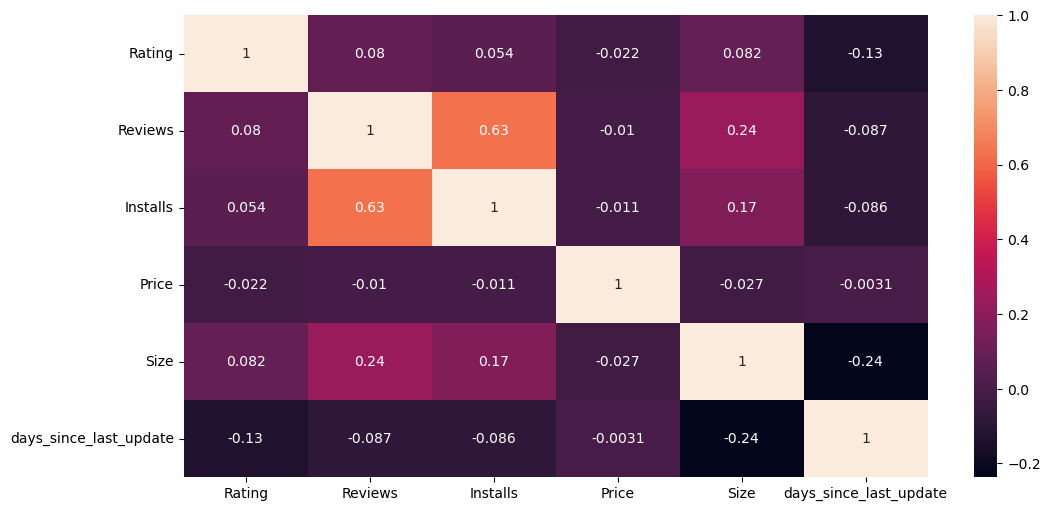

In [20]:
sns.heatmap(data[numeric_cols].corr(),annot=True)

## Data Encoding

In [21]:
def categorize_rating(rating):
    if rating >= 1 and rating < 4.0:
        return 1
    elif rating >= 4 and rating < 4.25:
        return 2
    elif rating >= 4.25 and rating < 4.5:
        return 3
    elif rating >= 4.5 and rating < 4.75:
        return 4
    elif rating >= 4.75 and rating <= 5:
        return 5
    else:
        return np.nan  # Return NaN for ratings that don't match any condition
# Apply the function to the 'Rating' column to create the 'Rating Interval' column
data['Rating Interval'] = data['Rating'].apply(categorize_rating)
#1-4

In [22]:
data['Rating Interval'].value_counts()

Rating Interval
4    1803
1    1757
2    1724
3    1575
5     563
Name: count, dtype: int64

<BarContainer object of 5 artists>

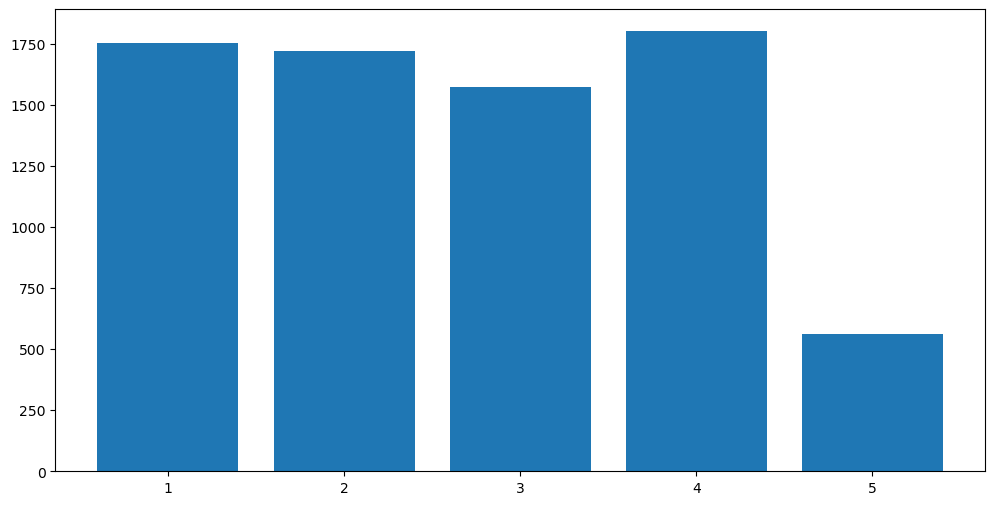

In [23]:
plt.bar(data['Rating Interval'].value_counts().index,data['Rating Interval'].value_counts())

In [24]:
data.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,days_since_last_update,Rating Interval
0,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,213,2
1,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,205,1
2,ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,7,4
3,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,61,4
4,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,49,3


In [25]:
data = pd.get_dummies(data, columns=['Category', 'Content Rating','Genres','Type'], dtype=float)
encoded_data_head = data.head()
original_shape = data.shape
encoded_shape = data.shape

In [26]:
data.shape

(7422, 160)

## Standardization

In [27]:
def Standardization(dataframe):
    df_std = dataframe.copy()
    for col in df_std.columns:
        df_std[col] =(df_std[col]-df_std[col].mean())/df_std[col].std()
    return df_std

## Outlier Detection

In [28]:
len(data['Rating'].unique())

39

<Axes: >

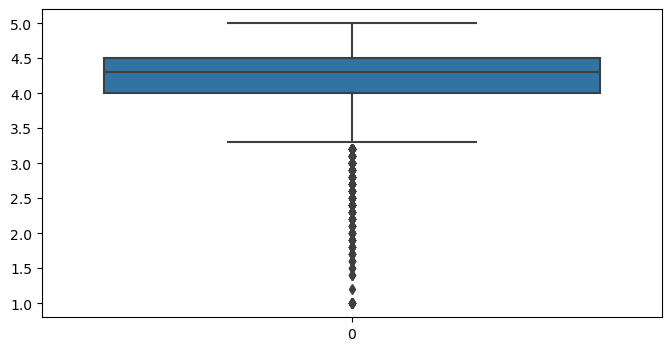

In [29]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Rating"])

<Axes: >

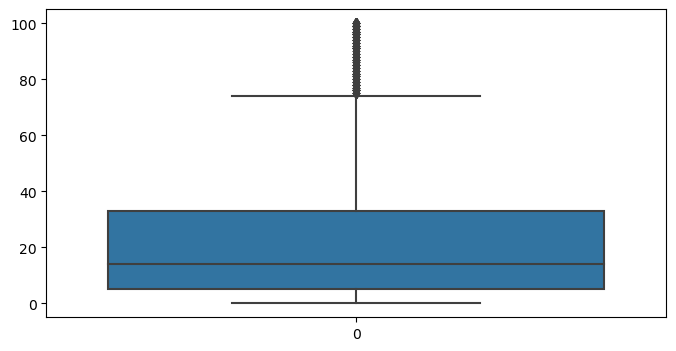

In [30]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Size"])

<Axes: >

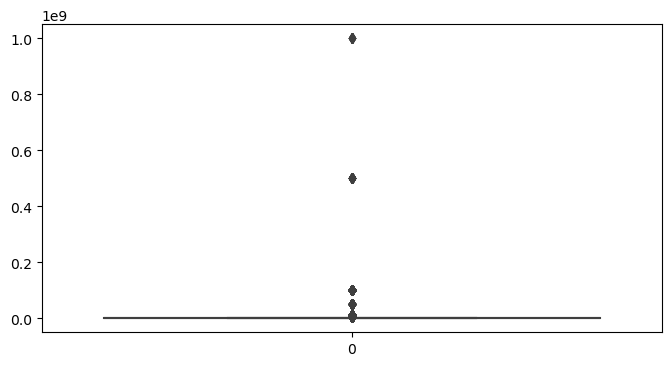

In [31]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Installs"])

<Axes: >

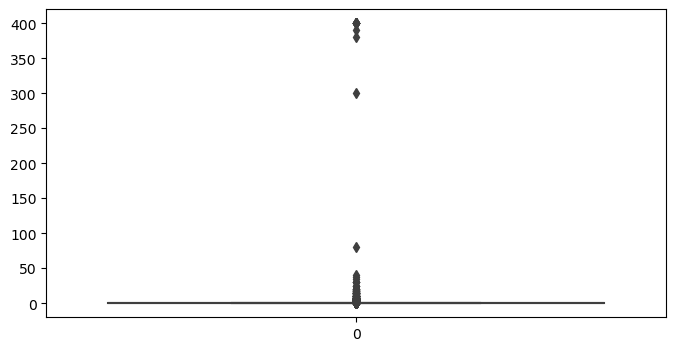

In [32]:
plt.figure(figsize=(8,4))
sns.boxplot(data["Price"])

### DB-SCAN

In [33]:
from sklearn.cluster import DBSCAN
features = data[['Rating','Reviews', 'Price', 'Size', 'Installs','days_since_last_update']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(features_scaled)
non_outlier_indices = clusters != -1
data_db = data[non_outlier_indices]
outliers_removed = len(data) - len(data_db)
data_db_preview = data_db[['Rating','Price', 'Reviews', 'Size', 'Installs','days_since_last_update']].head()
outliers_removed, data_db_preview


(45,
    Rating  Price  Reviews  Size  Installs  days_since_last_update
 0     4.1    0.0      159  19.0     10000                     213
 1     3.9    0.0      967  14.0    500000                     205
 2     4.7    0.0    87510   8.7   5000000                       7
 3     4.5    0.0   215644  25.0  50000000                      61
 4     4.3    0.0      967   2.8    100000                      49)

In [34]:
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest(random_state=0).fit(data)

outliers_pred = clf.predict(data)
outliers = data[outliers_pred == -1]
non_outlier_indices = clusters != -1
len(non_outlier_indices)
data_if = data[non_outlier_indices]
outliers_removed = len(data) - len(data_if)
data_if_preview = data_if[['Rating','Price', 'Reviews', 'Size', 'Installs','days_since_last_update']].head()
outliers_removed, data_if_preview

(45,
    Rating  Price  Reviews  Size  Installs  days_since_last_update
 0     4.1    0.0      159  19.0     10000                     213
 1     3.9    0.0      967  14.0    500000                     205
 2     4.7    0.0    87510   8.7   5000000                       7
 3     4.5    0.0   215644  25.0  50000000                      61
 4     4.3    0.0      967   2.8    100000                      49)

# Predictive Analysis

## Classification without outlier detection

### Split dataset

In [34]:
features=data.drop(['Rating', 'Rating Interval'],axis=1)
label=data['Rating Interval']
standardized_features=Standardization(features)
train_X,test_X,train_Y,test_Y=train_test_split(standardized_features,label,test_size=0.2,random_state=527)
smote = SMOTE()

# Fit and apply SMOTE
train_X, train_Y = smote.fit_resample(train_X, train_Y)

### Support Vector Machine

In [36]:
def objective(trial):
    params = params = {
        'C': trial.suggest_int('C', 1, 10),
        'kernel': trial.suggest_categorical('kernel',['linear', 'poly', 'rbf', 'sigmoid']),
        'gamma': trial.suggest_uniform('gamma', 0.1, 1),
    }
    SVM_model = svm.SVC(**params)
    SVM_model.fit(train_X, train_Y)
    y_pred = SVM_model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1, show_progress_bar=True)
# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

[I 2024-04-12 13:51:08,142] A new study created in memory with name: no-name-28d078ca-d8c3-4865-92ad-6f7bade8dd21


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2024-04-12 13:51:34,639] Trial 0 finished with value: 0.2787878787878788 and parameters: {'C': 5, 'kernel': 'linear', 'gamma': 0.5890182464325286}. Best is trial 0 with value: 0.2787878787878788.
Best Params: {'C': 5, 'kernel': 'linear', 'gamma': 0.5890182464325286}


In [37]:
clf_SVM= svm.SVC(**best_params)
clf_SVM.fit(train_X, train_Y)
y_pred=clf_SVM.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

0.2787878787878788

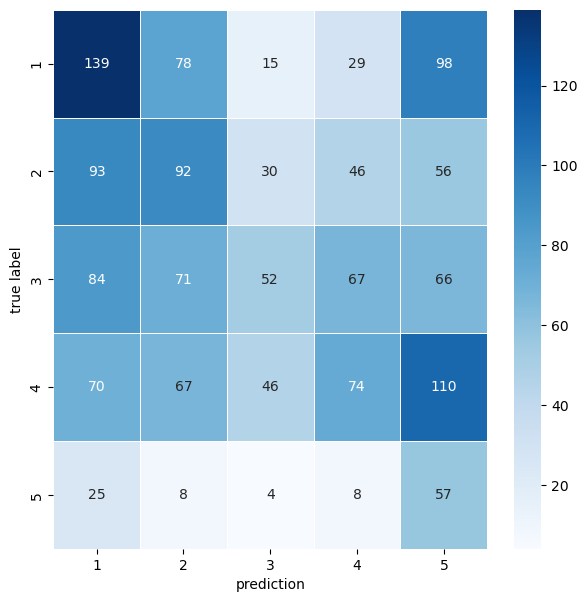

In [38]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt="d", cmap='Blues',ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

### Random Forest

In [39]:
def objective(trial):
    params = params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'criterion': trial.suggest_categorical('criterion',['gini', 'entropy']),
        'max_features': trial.suggest_int('max_features', 1, 10),
    }
    RF_model = RandomForestClassifier(**params)
    RF_model.fit(train_X, train_Y)
    y_pred = RF_model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3, show_progress_bar=True)
# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

[I 2024-04-12 02:24:35,773] A new study created in memory with name: no-name-7cfec456-26aa-43d5-9067-d78cc6f5911f


  0%|          | 0/3 [00:00<?, ?it/s]

[I 2024-04-12 02:24:45,083] Trial 0 finished with value: 0.4134680134680135 and parameters: {'n_estimators': 830, 'criterion': 'gini', 'max_features': 7}. Best is trial 0 with value: 0.4134680134680135.
[I 2024-04-12 02:24:52,178] Trial 1 finished with value: 0.41414141414141414 and parameters: {'n_estimators': 676, 'criterion': 'gini', 'max_features': 6}. Best is trial 1 with value: 0.41414141414141414.
[I 2024-04-12 02:25:00,805] Trial 2 finished with value: 0.4202020202020202 and parameters: {'n_estimators': 685, 'criterion': 'entropy', 'max_features': 8}. Best is trial 2 with value: 0.4202020202020202.
Best Params: {'n_estimators': 685, 'criterion': 'entropy', 'max_features': 8}


In [40]:
clf_RF= RandomForestClassifier(**best_params)
clf_RF.fit(train_X, train_Y)
y_pred=clf_RF.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

0.41885521885521887

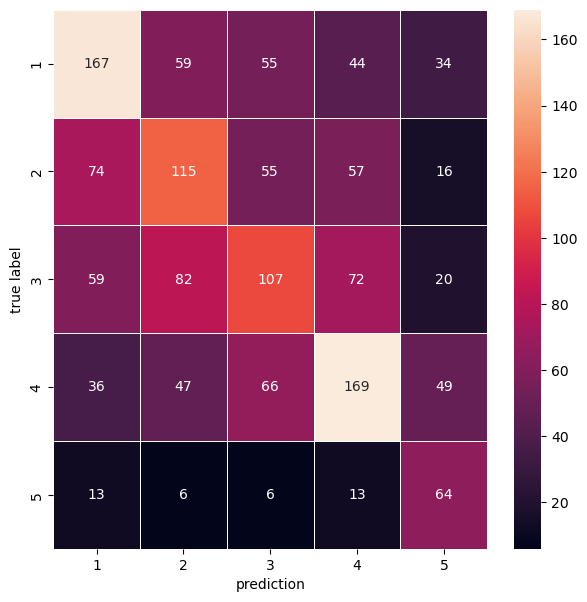

In [41]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt="d",ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

### Lightgbm

In [42]:
def objective(trial):
    params = params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200),
        'boosting_type': trial.suggest_categorical('boosting_type',['gbdt','rf','dart']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    model = lgbm.LGBMClassifier(**params)
    model.fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

[I 2024-04-12 02:25:28,697] A new study created in memory with name: no-name-a899d03e-0115-44d7-9aa3-417fa1343ef1


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.2824701757484868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2824701757484868
[LightGBM] [Warning] bagging_fraction is set=0.19610902442464784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19610902442464784
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.2824701757484868, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2824701757484868
[LightGBM] [Warning] bagging_fraction is set=0.19610902442464784, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19610902442464784
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000638 sec

In [43]:
clf= lgbm.LGBMClassifier(**best_params)
clf.fit(train_X, train_Y)
y_pred=clf.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

[LightGBM] [Warning] feature_fraction is set=0.602523848363144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.602523848363144
[LightGBM] [Warning] bagging_fraction is set=0.37933696964470853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.37933696964470853
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.602523848363144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.602523848363144
[LightGBM] [Warning] bagging_fraction is set=0.37933696964470853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.37933696964470853
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001628 seconds

0.42424242424242425

In [44]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = train_X.columns
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Size                           39213.000000
 2) days_since_last_update         37462.000000
 3) Reviews                        37438.000000
 4) Installs                       14859.000000
 5) Category_FAMILY                2905.000000
 6) Content Rating_Everyone        2442.000000
 7) Price                          1850.000000
 8) Category_GAME                  1560.000000
 9) Category_TOOLS                 1320.000000
10) Content Rating_Teen            1252.000000
11) Genres_Entertainment           1134.000000
12) Genres_Education               948.000000
13) Type_Free                      725.000000
14) Category_LIFESTYLE             708.000000
15) Category_MEDICAL               605.000000
16) Category_PERSONALIZATION       601.000000
17) Category_HEALTH_AND_FITNESS    484.000000
18) Genres_Tools                   478.000000
19) Category_BUSINESS              467.000000
20) Content Rating_Mature 17+      445.000000
21) Category_SPORTS                398.000000
22) Genres_Action  

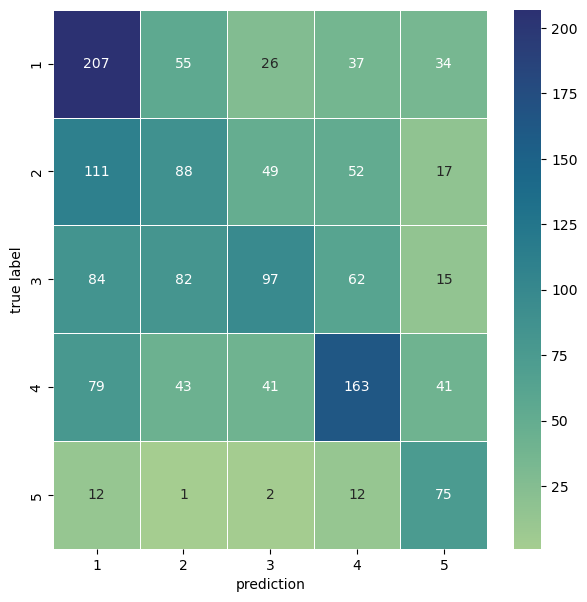

In [45]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

In [47]:
y_score=clf.predict_proba(test_X)

[LightGBM] [Warning] feature_fraction is set=0.602523848363144, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.602523848363144
[LightGBM] [Warning] bagging_fraction is set=0.37933696964470853, subsample=1.0 will be ignored. Current value: bagging_fraction=0.37933696964470853
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


In [48]:
label_binarizer = LabelBinarizer().fit(train_Y)
y_onehot_test = label_binarizer.transform(test_Y)

fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes=y_onehot_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

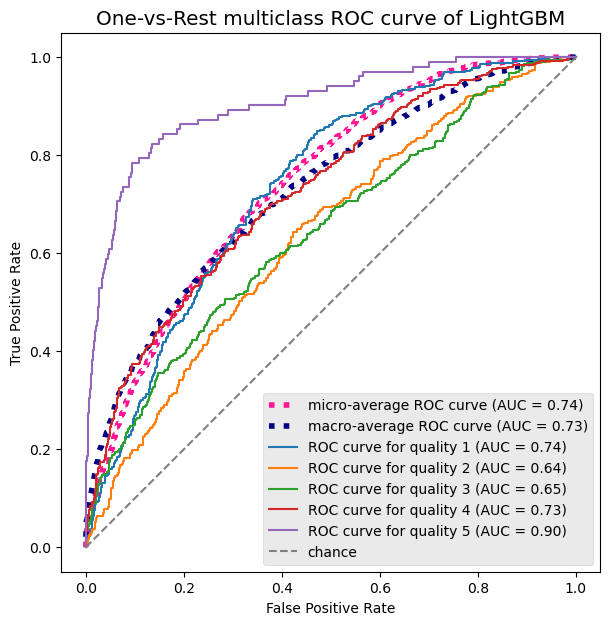

In [49]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(7, 7))
plt.style.use('ggplot')

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for quality {1+class_id}",
        ax=ax,
    )

plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'--',color='grey',label='chance')

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass ROC curve of LightGBM")
plt.legend()
plt.savefig("ROC.pdf")
plt.show()

## Classification with outlier detection

### Split dataset

In [34]:
features=data_db.drop(['Rating', 'Rating Interval'],axis=1)
label=data_db['Rating Interval']
standardized_features=Standardization(features)
train_X,test_X,train_Y,test_Y=train_test_split(standardized_features,label,test_size=0.2,random_state=527)
smote = SMOTE()
# Fit and apply SMOTE
train_X, train_Y = smote.fit_resample(train_X, train_Y)

### Support Vector Machine

In [35]:
def objective(trial):
    params = params = {
        'C': trial.suggest_int('C', 1, 10),
        'kernel': trial.suggest_categorical('kernel',['linear', 'poly', 'rbf', 'sigmoid']),
        'gamma': trial.suggest_uniform('gamma', 0.1, 1),
    }
    SVM_model = svm.SVC(**params)
    SVM_model.fit(train_X, train_Y)
    y_pred = SVM_model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1, show_progress_bar=True)
# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

[I 2024-04-12 14:10:15,194] A new study created in memory with name: no-name-3f792ada-ac43-4939-af52-0bae6df53851


  0%|          | 0/1 [00:00<?, ?it/s]

[I 2024-04-12 14:10:20,043] Trial 0 finished with value: 0.3116531165311653 and parameters: {'C': 10, 'kernel': 'rbf', 'gamma': 0.17848146731938086}. Best is trial 0 with value: 0.3116531165311653.
Best Params: {'C': 10, 'kernel': 'rbf', 'gamma': 0.17848146731938086}


In [36]:
clf_SVM= svm.SVC(**best_params)
clf_SVM.fit(train_X, train_Y)
y_pred=clf_SVM.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

0.3116531165311653

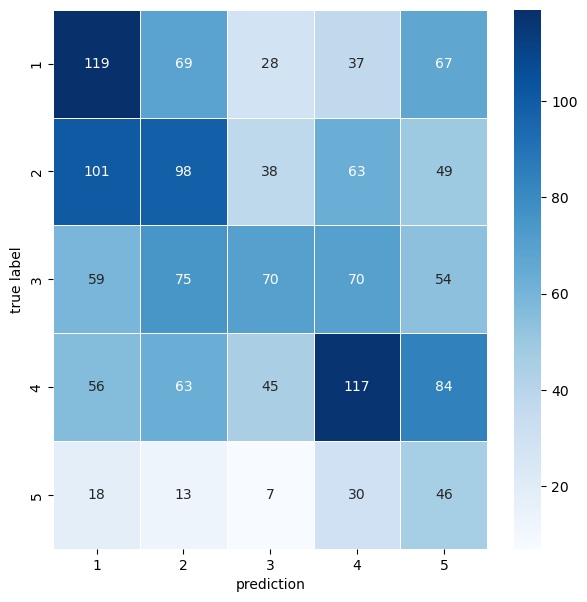

In [37]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt="d", cmap='Blues',ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

### Random Forest

In [40]:
def objective(trial):
    params = params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'criterion': trial.suggest_categorical('criterion',['gini', 'entropy']),
        'max_features': trial.suggest_int('max_features', 1, 10),
    }
    RF_model = RandomForestClassifier(**params)
    RF_model.fit(train_X, train_Y)
    y_pred = RF_model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3, show_progress_bar=True)
# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

[I 2024-04-12 02:10:32,846] A new study created in memory with name: no-name-f1457403-0552-4e32-9a99-78341e3546c4


  0%|          | 0/3 [00:00<?, ?it/s]

[I 2024-04-12 02:10:38,955] Trial 0 finished with value: 0.3943089430894309 and parameters: {'n_estimators': 549, 'criterion': 'gini', 'max_features': 8}. Best is trial 0 with value: 0.3943089430894309.
[I 2024-04-12 02:10:47,129] Trial 1 finished with value: 0.3807588075880759 and parameters: {'n_estimators': 828, 'criterion': 'gini', 'max_features': 2}. Best is trial 0 with value: 0.3943089430894309.
[I 2024-04-12 02:10:48,924] Trial 2 finished with value: 0.39634146341463417 and parameters: {'n_estimators': 134, 'criterion': 'entropy', 'max_features': 9}. Best is trial 2 with value: 0.39634146341463417.
Best Params: {'n_estimators': 134, 'criterion': 'entropy', 'max_features': 9}


In [41]:
clf_RF= RandomForestClassifier(**best_params)
clf_RF.fit(train_X, train_Y)
y_pred=clf_RF.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

0.3956639566395664

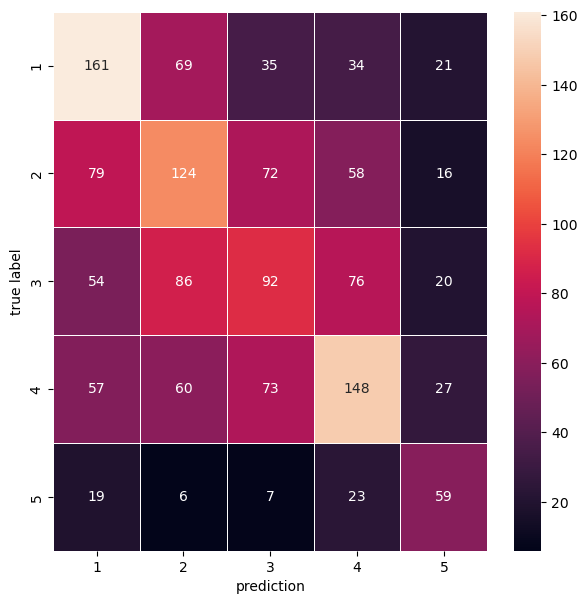

In [45]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,fmt="d",ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

## Lightgbm


In [34]:
def objective(trial):
    params = params = {
        'n_estimators': trial.suggest_int('n_estimators', 20, 200),
        'boosting_type': trial.suggest_categorical('boosting_type',['gbdt','rf','dart']),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }
    model = lgbm.LGBMClassifier(**params)
    model.fit(train_X, train_Y)
    y_pred = model.predict(test_X)
    accuracy=accuracy_score(test_Y,y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")


[I 2024-04-12 01:43:45,773] A new study created in memory with name: no-name-e3101653-aa26-4020-acfa-350a2ccb1060


  0%|          | 0/50 [00:00<?, ?it/s]

[LightGBM] [Warning] feature_fraction is set=0.7983387559455831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983387559455831
[LightGBM] [Warning] bagging_fraction is set=0.376372035965009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.376372035965009
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.7983387559455831, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7983387559455831
[LightGBM] [Warning] bagging_fraction is set=0.376372035965009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.376372035965009
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001529 seconds.
Yo

In [35]:
clf= lgbm.LGBMClassifier(**best_params)
clf.fit(train_X, train_Y)
y_pred=clf.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
accuracy

[LightGBM] [Warning] feature_fraction is set=0.6226752213186314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6226752213186314
[LightGBM] [Warning] bagging_fraction is set=0.9936927033416716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9936927033416716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.6226752213186314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6226752213186314
[LightGBM] [Warning] bagging_fraction is set=0.9936927033416716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9936927033416716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000987 seconds

0.42140921409214094

In [36]:
importances = clf.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
feat_labels = train_X.columns
for f in range(train_X.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) Reviews                        9532.000000
 2) Size                           9485.000000
 3) days_since_last_update         8859.000000
 4) Installs                       4939.000000
 5) Price                          1055.000000
 6) Content Rating_Everyone        712.000000
 7) Category_FAMILY                640.000000
 8) Content Rating_Teen            458.000000
 9) Category_GAME                  436.000000
10) Genres_Entertainment           386.000000
11) Category_TOOLS                 369.000000
12) Genres_Education               342.000000
13) Category_PERSONALIZATION       266.000000
14) Genres_Action                  258.000000
15) Category_HEALTH_AND_FITNESS    245.000000
16) Content Rating_Mature 17+      237.000000
17) Category_MEDICAL               237.000000
18) Type_Free                      230.000000
19) Genres_Casual                  194.000000
20) Content Rating_Everyone 10+    188.000000
21) Category_LIFESTYLE             185.000000
22) Category_BUSINESS        

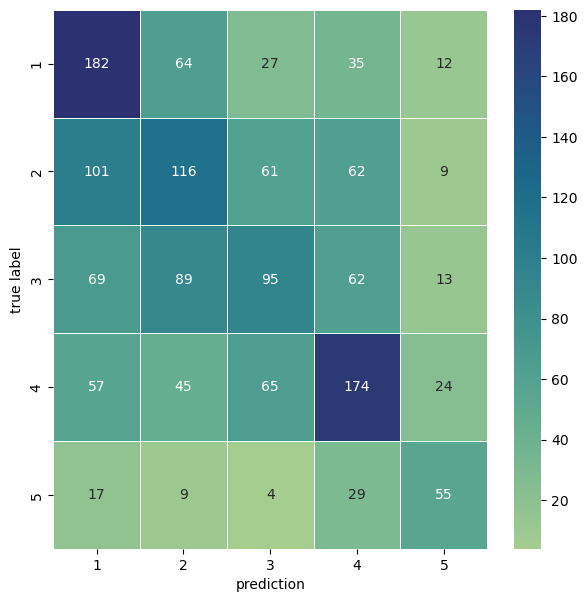

In [37]:
cm=confusion_matrix(test_Y,y_pred)
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()

In [38]:
y_score=clf.predict_proba(test_X)

[LightGBM] [Warning] feature_fraction is set=0.6226752213186314, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6226752213186314
[LightGBM] [Warning] bagging_fraction is set=0.9936927033416716, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9936927033416716
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [39]:
label_binarizer = LabelBinarizer().fit(train_Y)
y_onehot_test = label_binarizer.transform(test_Y)

fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

n_classes=y_onehot_test.shape[1]
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

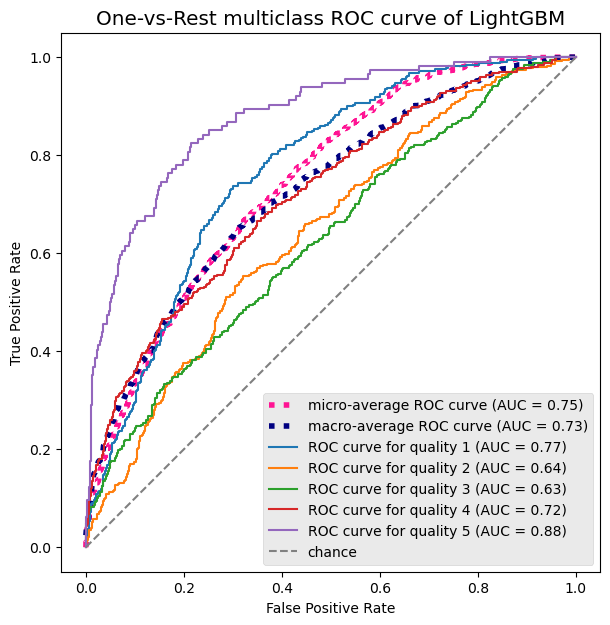

In [40]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(7, 7))
plt.style.use('ggplot')

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

for class_id in range(n_classes):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for quality {1+class_id}",
        ax=ax,
    )

plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),'--',color='grey',label='chance')

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest multiclass ROC curve of LightGBM")
plt.legend()
plt.savefig("ROC.pdf")
plt.show()

# Not Included

## Catboost

In [ ]:
import catboost as cat
from catboost import CatBoostClassifier, Pool
print('CatBoost version',cat.__version__)

CatBoost version 1.2.3


In [ ]:
CB = cat.CatBoostClassifier(task_type='GPU',loss_function='MultiClass')
CB.fit(train_X, train_Y)

In [ ]:
y_pred=CB.predict(test_X)
accuracy=accuracy_score(test_Y,y_pred)
print('Catboost Model accuracy score: {0:0.4f}'.format(accuracy_score(test_Y, y_pred)))

In [ ]:
y_pred_train = CB.predict(train_X)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(train_Y, y_pred_train)))

In [ ]:
cm = confusion_matrix(test_Y, y_pred)

In [ ]:
f, ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.5,cmap="crest",fmt=".0f",ax=ax,xticklabels=['1','2','3','4','5'],
            yticklabels=['1','2','3','4','5'])
plt.xlabel("prediction")
plt.ylabel("true label")
plt.show()